# MalagaHouse

*Trabajo Fin de Máster FP en IA y Big Data realizado por Miguel Gámez Ruiz y Sergio Toscano Díaz*

<img width="650" src="https://drive.google.com/uc?id=1bKCPieOVMbV5VJoofNT9oPxnWGLWNN-U">

## 1. Justificación y descripción del proyecto



### Justificación:
Hemos decidido hacer un proyecto en el que se pueda obtener el precio de las viviendas en Málaga de una forma rápida. Pensamos que puede ser útil para quiénes buscan un lugar para vivir aquí en Málaga. De esta manera, el cliente podrá ver qué presupuesto necesitará para comprar o vender según el tipo de vivienda que esté buscando o vendiendo. Usamos datos reales para que el cliente tenga una estimación más acertada del precio.

### Descripción:
El proyecto de Machine Learning constará de lo siguiente:

- Un modelo entrenado que haga la predicción de las viviendas en Málaga.
- Una aplicación web en la que, en base a los parámetros que se pidan, se obtendrá el precio estimado de las viviendas.
- Enlaces a los recursos utilizados.
- Una presentación PDF y un vídeo explicativo del proyecto.



## 2. Obtención de datos

Usamos Scrapping para obtener los datos de las viviviendas de Málaga Capital:

Ver el cuaderno [Scrapping MalagaHouse](https://colab.research.google.com/drive/1A0mQj0kTm9H20nlD19nb37SNhqs26OX7#scrollTo=_dR2wiHFtlGC)

Importamos las librerías que vamos a  necesitar.



In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [495]:
file_path = '/content/drive/MyDrive/datasets/MalagaHouse/housingzonas.csv'
houses = pd.read_csv(file_path)

#file_path = '/content/drive/MyDrive/housing (2).csv'
#houses = pd.read_csv(file_path)

In [496]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Descripción de los datos

En el dataset que hemos generado con scrapping tenemos los siguientes campos:

- Tipo: Nombre del tipo de vivienda (Piso, ático, casa).
- Zona: Nombre de la zona de Málaga en la que se encuentra la vivienda.
- Precio: Precio de la vivienda.
- Superficie: Los metros cuadrados que ocupa la superficie de la vivienda.
- Habitaciones: Número de habitaciones que tiene la vivienda.
- Baños: Número de baños que tiene la vivienda.
- Garaje: Si tiene garaje o no. 1 si tiene y 0 si no tiene.
- Trastero: Si tiene garaje o no.  1 si tiene y 0 si no tiene.
- Ascensor: Si tiene ascensor o no. 1 si tiene y 0 si no tiene.
- Terraza: Si tiene terraza o no. 1 si tiene y 0 si no tiene.
- Amueblado: Si tiene amueblado o no. 1 si tiene y 0 si no tiene.
- Chimenea: Si tiene chimenea o no. 1 si tiene y 0 si no tiene.
- Piscina: Si tiene piscina o no. 1 si tiene y 0 si no tiene.
- Jardín: Si tiene jardín o no. 1 si tiene y 0 si no tiene.
- Descripción: Descripción de la vivienda según el vendedor.

## 3. Exploración y visualización de los datos

In [497]:
houses

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,Bailén-Miraflores,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,Centro,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,Este,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,Centro,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,Ciudad Jardín,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Piso,Bailén-Miraflores,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,Piso,Centro,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,Casa,Churriana,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,Piso,Teatinos-Universidad,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


In [498]:
houses.head()

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,Bailén-Miraflores,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,Centro,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,Este,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,Centro,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,Ciudad Jardín,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...


In [499]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2103 non-null   object
 1   Zona          2190 non-null   object
 2   Precio        2190 non-null   object
 3   Superficie    2190 non-null   int64 
 4   Habitaciones  2190 non-null   int64 
 5   Baños         2190 non-null   int64 
 6   Garaje        2190 non-null   int64 
 7   Trastero      2190 non-null   int64 
 8   Ascensor      2190 non-null   int64 
 9   Terraza       2190 non-null   int64 
 10  Amueblado     2190 non-null   int64 
 11  Chimenea      2190 non-null   int64 
 12  Piscina       2190 non-null   int64 
 13  Jardín        2190 non-null   int64 
 14  Descripción   2190 non-null   object
dtypes: int64(11), object(4)
memory usage: 256.8+ KB


¿Cuáles son los valores que contiene `Zona`?



In [500]:
houses['Zona'].unique()

array(['Bailén-Miraflores', 'Centro', 'Este', 'Ciudad Jardín',
       'Carretera de Cádiz', 'Teatinos-Universidad', 'Churriana',
       'La Rosaleda-La Roca', 'Cruz de Humilladero', 'Campanillas',
       'Puerto de la Torre'], dtype=object)

¿Cuántas casas hay en cada `Zona` en este dataset?

In [501]:
houses['Zona'].value_counts()

Centro                  501
Este                    331
Carretera de Cádiz      289
Bailén-Miraflores       223
Cruz de Humilladero     195
Puerto de la Torre      147
Ciudad Jardín           124
Churriana               117
Teatinos-Universidad    102
La Rosaleda-La Roca      95
Campanillas              66
Name: Zona, dtype: int64

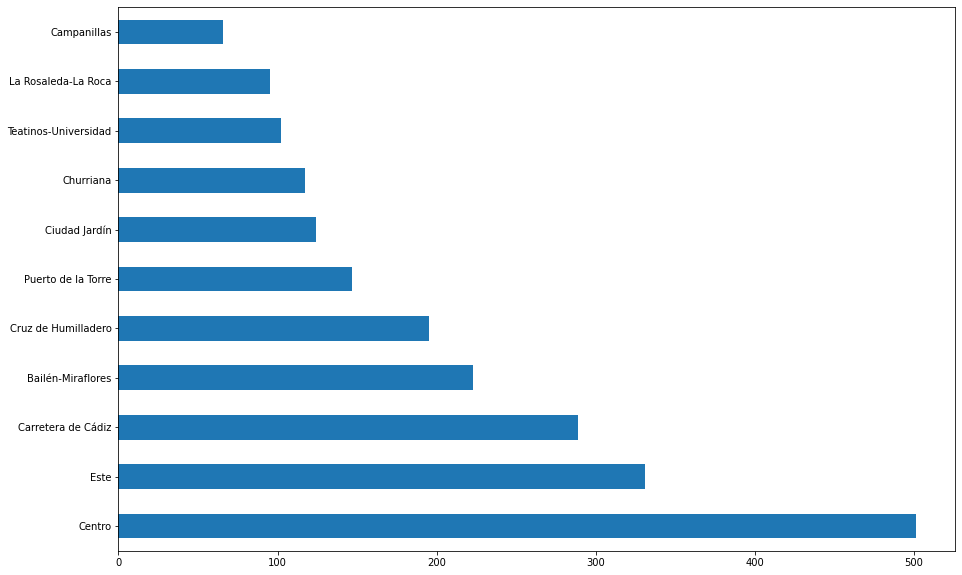

In [502]:
houses['Zona'].value_counts().plot(kind="barh", figsize = (15, 10))
plt.show()

Vamos a explorar algunas zonas como *Campanillas* o el *Centro*. Dicho de otra forma, la zona que tiene menos datos y la que más en este dataset.

In [503]:
campanillas = houses.loc[houses.Zona=='Campanillas']
campanillas

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
28,Chalet,Campanillas,295000,230,4,2,1,0,0,1,0,0,0,0,"Casa adosada en campanillas, maqueda!!\r A tan..."
46,Casa,Campanillas,220000,200,3,1,1,0,0,0,0,0,0,0,Excelente casa sobre 200m2. dos plantas mas un...
53,Chalet,Campanillas,198000,207,4,1,0,0,0,0,0,0,0,0,Identificação do imóvel: ZMES506175La vivienda...
128,Casa,Campanillas,290000,150,3,2,1,1,0,1,0,0,0,0,Casa adosada en la Charca ( Torrox-Costa) de 3...
137,Chalet,Campanillas,295000,230,4,2,1,0,0,1,0,0,0,0,"Casa adosada en campanillas, maqueda!!\r A tan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,Casa,Campanillas,324950,151,3,2,1,1,0,1,0,0,0,1,Casa 38. Casa de obra nueva de 151 m2 de super...
2030,Casa,Campanillas,225000,100,3,2,1,0,0,1,0,0,0,1,REDPISO vende en exclusiva fantástica casa uni...
2064,Casa,Campanillas,198000,200,4,1,0,0,0,1,0,0,0,0,"CAMPANILLAS. Vivienda de cuatro dormitorios, d..."
2144,Casa,Campanillas,260000,160,3,1,0,0,0,1,0,0,0,0,"Tarajal casamata haciendo esquina, situada jun..."


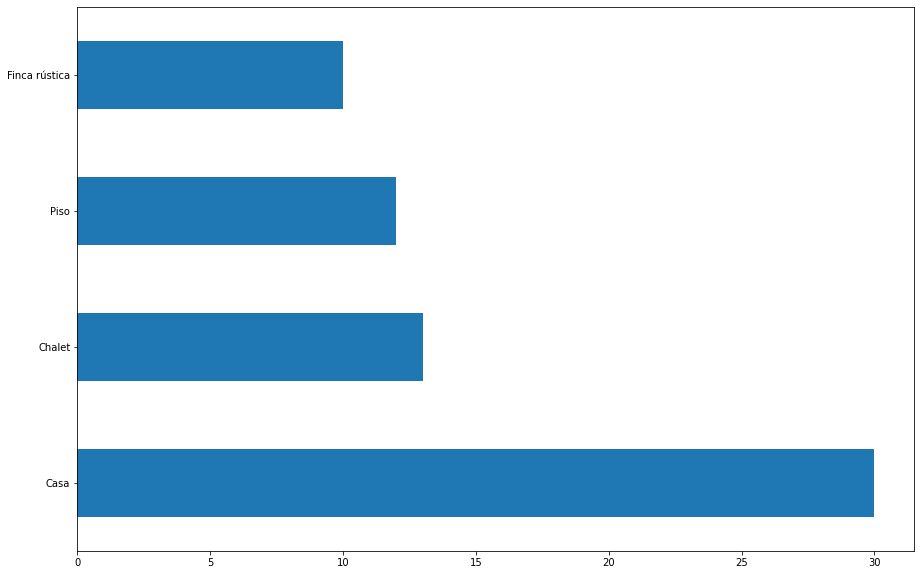

In [504]:
campanillas['Tipo'].value_counts().plot(kind="barh", figsize = (15, 10))
plt.show()

In [505]:
centro = houses.loc[houses.Zona=='Centro']
centro

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
1,Piso,Centro,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
3,Dúplex,Centro,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
7,Piso,Centro,439000,137,3,2,0,0,1,1,0,0,0,0,"Piso a reformar en pleno Soho, zona rodeada de..."
9,Piso,Centro,115000,69,2,1,0,0,0,0,0,0,0,0,"Se vende piso en la zona de la Trinidad, es un..."
10,Piso,Centro,189000,99,3,1,0,0,1,1,0,0,0,0,PISO MUY AMPLIO Y LUMINOSO DE 95M2 PARA ENTRAR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Piso,Centro,995000,150,4,3,0,0,1,1,0,0,0,0,"Piso en Málaga zona Malagueta, consta de 150 m..."
2178,Dúplex,Centro,390000,141,3,2,0,0,1,1,0,0,0,0,"ATICO-DÚPLEX CON TERRAZA, en el Centro de Mála..."
2181,Dúplex,Centro,540000,87,3,2,0,0,1,1,0,0,0,1,¡Este hermoso ático dúplex está nuevamente en ...
2184,Piso,Centro,195000,122,1,1,0,0,1,0,1,0,0,0,"Vendo piso nuevo, zona centro histórico Málaga..."


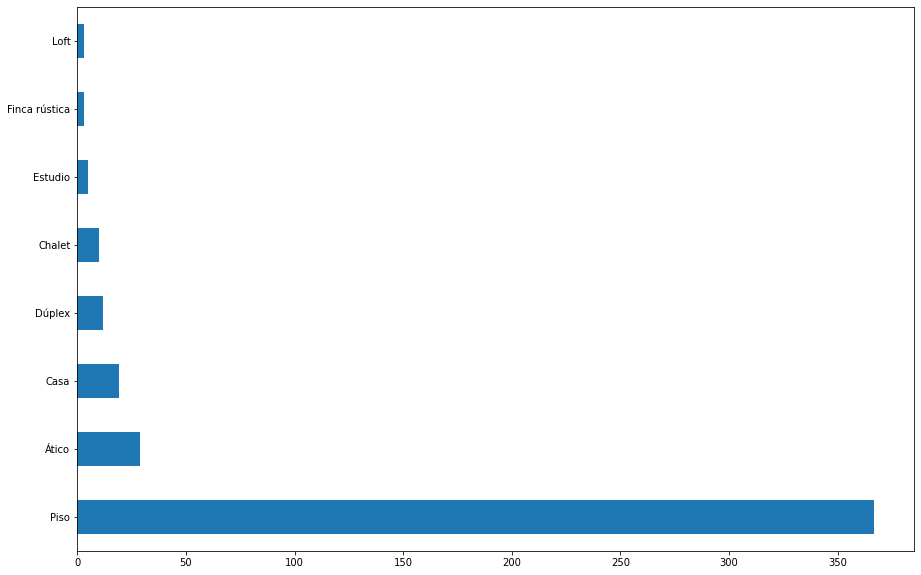

In [506]:
centro['Tipo'].value_counts().plot(kind="barh", figsize = (15, 10))
plt.show()

¿Se repiten algunos precios?

In [507]:
houses['Precio'].value_counts()

350000    30
295000    22
450000    22
270000    21
240000    20
          ..
267000     1
168500     1
890900     1
673000     1
261387     1
Name: Precio, Length: 701, dtype: int64

Media, máximo, mínimo, percentiles, etc.

In [508]:
houses.describe()

,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,147.606849,3.277169,1.978995,0.422374,0.295890,0.531963,0.627854,0.226484,0.084932,0.213242,0.137900
std,111.322899,1.322532,1.095494,0.494050,0.456546,0.499091,0.483487,0.418651,0.278843,0.409691,0.344873
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,170.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,991.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


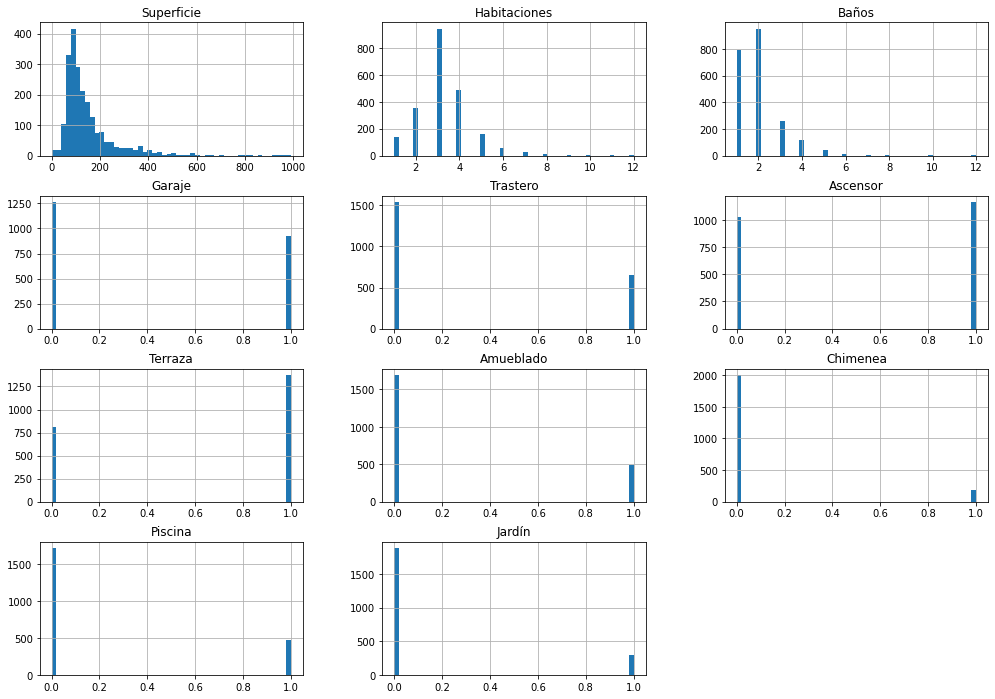

In [509]:
houses.hist(bins=50, figsize=(17, 12))
plt.show()

## 4. Limpieza de datos y Preparación de los datos para los algoritmos de Machine Learning

### Transformación de tipo de dato

Observamos que hay campos en los que el precio es "A consultar", por lo que no es un dato numérico y decidimos eliminar esas filas.

In [510]:
houses[houses["Precio"] == "A consultar"]

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
67,Piso,Cruz de Humilladero,A consultar,87,3,1,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle malaga-rio..."
567,Piso,Puerto de la Torre,A consultar,103,3,2,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 103 m2 de...
585,Piso,Puerto de la Torre,A consultar,90,2,2,1,0,0,1,0,0,1,0,"Edificio de 14 viviendas, 24 aparcamientos, tr..."
727,Piso,Puerto de la Torre,A consultar,95,2,2,1,1,1,1,0,0,0,0,Piso en una finca de obra nueva de 95 m2 de su...
1269,Chalet,Puerto de la Torre,A consultar,532,3,3,0,0,0,0,0,0,0,0,Próxima construcción de chalet independiente. ...
1608,Piso,Puerto de la Torre,A consultar,203,3,3,1,1,0,1,0,1,1,1,Chalet pareado ubicado en la avenida principal...
1697,Piso,Puerto de la Torre,A consultar,71,1,1,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 71 m2 de ...
1839,Chalet,Carretera de Cádiz,A consultar,73,2,1,1,0,0,0,0,0,0,0,********promoción santa cristina ******** list...
1880,Piso,La Rosaleda-La Roca,A consultar,84,2,2,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle calle ebro..."


In [511]:
houses.drop(houses[(houses['Precio'] == 'A consultar')].index, inplace=True)

In [512]:
houses['Precio'] = houses['Precio'].astype('int')

In [513]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2094 non-null   object
 1   Zona          2181 non-null   object
 2   Precio        2181 non-null   int64 
 3   Superficie    2181 non-null   int64 
 4   Habitaciones  2181 non-null   int64 
 5   Baños         2181 non-null   int64 
 6   Garaje        2181 non-null   int64 
 7   Trastero      2181 non-null   int64 
 8   Ascensor      2181 non-null   int64 
 9   Terraza       2181 non-null   int64 
 10  Amueblado     2181 non-null   int64 
 11  Chimenea      2181 non-null   int64 
 12  Piscina       2181 non-null   int64 
 13  Jardín        2181 non-null   int64 
 14  Descripción   2181 non-null   object
dtypes: int64(12), object(3)
memory usage: 272.6+ KB


Con el `Precio` como dato numérico, creamos las siguientes gráficas:

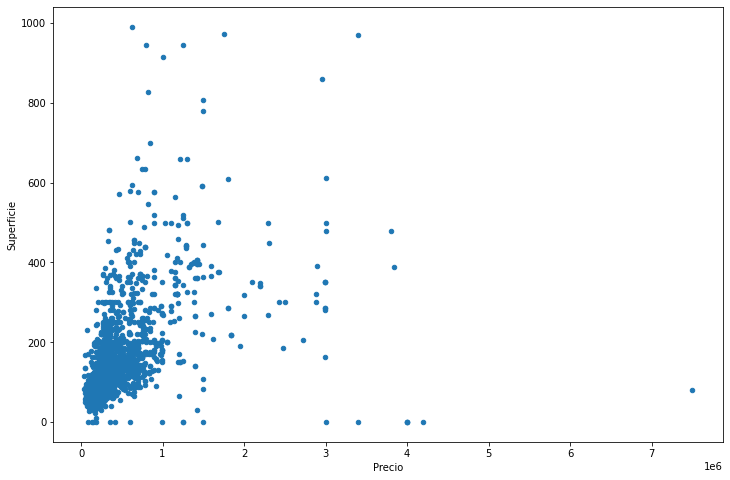

In [514]:
houses.plot(kind="scatter", x = "Precio", y = "Superficie", figsize = (12, 8))
plt.show()

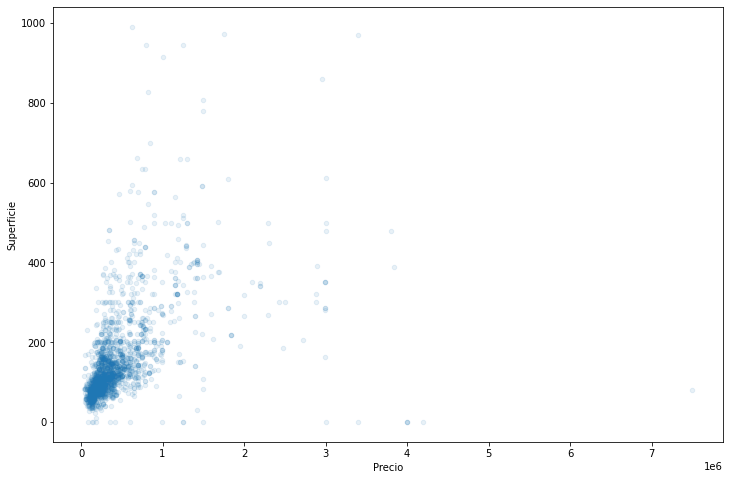

In [515]:
houses.plot(kind="scatter", x = "Precio", y = "Superficie", figsize = (12, 8), alpha = 0.1)
plt.show()

### Gestión de nulos

La mayoría de algoritmos de ML no trabajan bien cuando faltan datos. En el caso de la categoría `Tipo` vemos que faltan. 

In [516]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          2094 non-null   object
 1   Zona          2181 non-null   object
 2   Precio        2181 non-null   int64 
 3   Superficie    2181 non-null   int64 
 4   Habitaciones  2181 non-null   int64 
 5   Baños         2181 non-null   int64 
 6   Garaje        2181 non-null   int64 
 7   Trastero      2181 non-null   int64 
 8   Ascensor      2181 non-null   int64 
 9   Terraza       2181 non-null   int64 
 10  Amueblado     2181 non-null   int64 
 11  Chimenea      2181 non-null   int64 
 12  Piscina       2181 non-null   int64 
 13  Jardín        2181 non-null   int64 
 14  Descripción   2181 non-null   object
dtypes: int64(12), object(3)
memory usage: 272.6+ KB


In [517]:
houses[houses.isnull().any(axis=1)]

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
33,NaN,Centro,240000,175,2,1,0,0,1,0,1,0,0,0,Apartamento de dos dormitorios (uno exterior y...
66,NaN,La Rosaleda-La Roca,295000,40,1,1,1,0,1,0,0,0,1,1,Este proyecto único está ubicado en el borde d...
70,NaN,Centro,499000,115,7,1,0,0,0,1,0,0,0,0,"¿Está buscando un piso amplio, cómodo y solead..."
73,NaN,Centro,289000,65,2,1,0,0,1,0,0,0,0,0,¿Está buscando una gran oportunidad de inversi...
129,NaN,Centro,750000,164,3,3,1,0,0,0,1,0,0,0,Este apartamento totalmente reformado se encue...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,NaN,Centro,519900,154,4,2,0,0,0,0,1,0,0,0,Te gustaria vivir en pleno Casco Historico de ...
2054,NaN,Centro,190000,69,1,1,0,0,0,0,1,0,0,0,REDPISO VENDE EN EXCLUSIVA magnífico apartamen...
2092,NaN,Centro,295000,72,1,1,0,0,1,1,0,0,0,0,¿Está buscando un dúplex amplio y cómodo para ...
2099,NaN,Carretera de Cádiz,1618000,209,4,3,1,1,0,0,0,0,1,0,¿Quiere ser dueño de una propiedad en lo que e...


Hay un total de 87 filas en las que la categoría `Tipo` es *NaN*. Podemos hacer varias cosas por ejemplo, rellenar con un valor por defecto como `Piso` o eliminar todas esas filas. Decidimos eliminarlas de la siguiente forma:


In [518]:
houses = houses.dropna(subset=['Tipo'])

In [519]:
houses[houses.isnull().any(axis=1)]

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción


Observamos que ya no hay valores nulos.

### Conversión de categorías a números

La mayoría de algoritmos de ML trabajan mejor con números que con categorías.

In [520]:
houses['Zona'] 

0          Bailén-Miraflores
1                     Centro
2                       Este
3                     Centro
4              Ciudad Jardín
                ...         
2185       Bailén-Miraflores
2186                  Centro
2187               Churriana
2188    Teatinos-Universidad
2189     La Rosaleda-La Roca
Name: Zona, Length: 2094, dtype: object

In [521]:
houses["Zona"].unique()

array(['Bailén-Miraflores', 'Centro', 'Este', 'Ciudad Jardín',
       'Carretera de Cádiz', 'Teatinos-Universidad', 'Churriana',
       'La Rosaleda-La Roca', 'Cruz de Humilladero', 'Campanillas',
       'Puerto de la Torre'], dtype=object)

In [522]:
houses_zona = houses["Zona"].unique()

In [523]:
zona_num = np.arange(len(houses["Zona"].unique()))
zona_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Con este bloque de código asignamos un valor numérico a cada `Zona`.

In [524]:
houses["Zona"].replace(houses_zona, zona_num, inplace=True)
houses

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Piso,0,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,Piso,1,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,Ático,2,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,Dúplex,1,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,Casa,3,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Piso,0,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,Piso,1,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,Casa,6,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,Piso,5,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


In [525]:
houses['Tipo'] 

0         Piso
1         Piso
2        Ático
3       Dúplex
4         Casa
         ...  
2185      Piso
2186      Piso
2187      Casa
2188      Piso
2189      Casa
Name: Tipo, Length: 2094, dtype: object

In [526]:
houses["Tipo"].unique()

array(['Piso', 'Ático', 'Dúplex', 'Casa', 'Chalet', 'Finca rústica',
       'Estudio', 'Loft'], dtype=object)

In [527]:
houses_tipo = houses["Tipo"].unique()

In [528]:
tipo_num = np.arange(len(houses["Tipo"].unique()))
tipo_num

array([0, 1, 2, 3, 4, 5, 6, 7])

Con este bloque de código asignamos un valor numérico a cada `Tipo`.

In [529]:
houses["Tipo"].replace(houses_tipo, tipo_num, inplace=True)
houses

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,0,0,115000,69,2,1,0,0,0,0,1,0,0,0,"Se vende piso en calle churruca, muy bien situ..."
1,0,1,295000,70,2,1,0,1,1,0,0,0,0,0,Vivienda en venta en Málaga zona Centro histó...
2,1,2,477000,170,6,2,0,1,0,1,0,0,0,0,"""tlf/ whatsapp (+34) 670,671,098. Encantadora ..."
3,2,1,1950000,190,3,3,1,1,1,1,0,0,0,0,ÚNICO - INMEJORABLE LOCALIZACION - EXCLUSIVO -...
4,3,3,126000,90,3,1,0,0,0,1,0,0,0,0,Casa mata en venta en Ciudad Jardín situada en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,160000,72,2,1,0,0,1,0,1,0,0,0,Excelente vivienda de dos dormitorios en la cu...
2186,0,1,182000,112,4,1,0,0,1,0,0,0,0,0,Vivienda ubicada en Málaga.Piso exterior de 21...
2187,3,6,320000,160,4,2,1,1,0,1,1,1,1,0,Preciosa vivienda en la mejor zona de Churrian...
2188,0,5,340000,155,3,2,1,1,1,1,0,0,1,0,"Todo exterior, en uno de los mejores recintos ..."


### Eliminación de columnas

Decidimos eliminar la columna `Descripción` para realizar el entrenamiento de nuestro modelo.

In [530]:
houses.drop(columns='Descripción', inplace=True)
houses

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,0,115000,69,2,1,0,0,0,0,1,0,0,0
1,0,1,295000,70,2,1,0,1,1,0,0,0,0,0
2,1,2,477000,170,6,2,0,1,0,1,0,0,0,0
3,2,1,1950000,190,3,3,1,1,1,1,0,0,0,0
4,3,3,126000,90,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,160000,72,2,1,0,0,1,0,1,0,0,0
2186,0,1,182000,112,4,1,0,0,1,0,0,0,0,0
2187,3,6,320000,160,4,2,1,1,0,1,1,1,1,0
2188,0,5,340000,155,3,2,1,1,1,1,0,0,1,0


Con todo esto ya tenemos todos los datos numéricos.

In [531]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Tipo          2094 non-null   int64
 1   Zona          2094 non-null   int64
 2   Precio        2094 non-null   int64
 3   Superficie    2094 non-null   int64
 4   Habitaciones  2094 non-null   int64
 5   Baños         2094 non-null   int64
 6   Garaje        2094 non-null   int64
 7   Trastero      2094 non-null   int64
 8   Ascensor      2094 non-null   int64
 9   Terraza       2094 non-null   int64
 10  Amueblado     2094 non-null   int64
 11  Chimenea      2094 non-null   int64
 12  Piscina       2094 non-null   int64
 13  Jardín        2094 non-null   int64
dtypes: int64(14)
memory usage: 245.4 KB


Vemos de nuevo la media, el máximo, el mínimo, etc.

In [532]:
houses.describe()

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
count,2094.000000,2094.000000,2.094000e+03,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,1.143266,3.778892,4.300512e+05,149.442693,3.316141,1.988061,0.425024,0.305158,0.535817,0.639924,0.221108,0.088348,0.212989,0.138968
std,1.683088,3.084309,4.722594e+05,112.513287,1.306881,1.102207,0.494465,0.460584,0.498835,0.480137,0.415092,0.283868,0.409518,0.345996
min,0.000000,0.000000,3.383000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.850000e+05,82.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,2.930000e+05,114.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,6.000000,4.790000e+05,171.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,10.000000,7.500000e+06,991.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vemos las distintas correlaciones entre las categorías.

In [533]:
corr_matrix = houses.corr()
corr_matrix

,Tipo,Zona,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
Tipo,1.000000,0.183738,0.307970,0.552339,0.417520,0.443393,0.130604,0.031712,-0.602502,0.147822,-0.010485,0.420503,0.244074,0.198803
Zona,0.183738,1.000000,-0.131761,0.078072,0.102812,0.043916,0.177878,0.131938,-0.174808,0.069458,0.055371,0.124369,0.106526,0.010898
Precio,0.307970,-0.131761,1.000000,0.506026,0.461526,0.717514,0.278868,0.152519,-0.124654,0.234314,-0.025752,0.265860,0.361647,0.289153
Superficie,0.552339,0.078072,0.506026,1.000000,0.604066,0.609299,0.250005,0.141552,-0.342423,0.260683,-0.020143,0.412175,0.368410,0.281474
Habitaciones,0.417520,0.102812,0.461526,0.604066,1.000000,0.631836,0.169044,0.066664,-0.238710,0.285057,0.004956,0.322634,0.260679,0.201820
Baños,0.443393,0.043916,0.717514,0.609299,0.631836,1.000000,0.330174,0.200116,-0.242103,0.294319,-0.034955,0.357647,0.420572,0.317563
Garaje,0.130604,0.177878,0.278868,0.250005,0.169044,0.330174,1.000000,0.399462,0.021546,0.330988,0.002826,0.205497,0.378559,0.352768
Trastero,0.031712,0.131938,0.152519,0.141552,0.066664,0.200116,0.399462,1.000000,0.047025,0.276737,-0.095684,0.111624,0.291050,0.153502
Ascensor,-0.602502,-0.174808,-0.124654,-0.342423,-0.238710,-0.242103,0.021546,0.047025,1.000000,0.025944,0.013653,-0.273728,-0.032683,-0.077296
Terraza,0.147822,0.069458,0.234314,0.260683,0.285057,0.294319,0.330988,0.276737,0.025944,1.000000,-0.043834,0.187944,0.254156,0.226581


In [534]:
corr_matrix["Precio"].sort_values(ascending=False)

Precio          1.000000
Baños           0.717514
Superficie      0.506026
Habitaciones    0.461526
Piscina         0.361647
Tipo            0.307970
Jardín          0.289153
Garaje          0.278868
Chimenea        0.265860
Terraza         0.234314
Trastero        0.152519
Amueblado      -0.025752
Ascensor       -0.124654
Zona           -0.131761
Name: Precio, dtype: float64

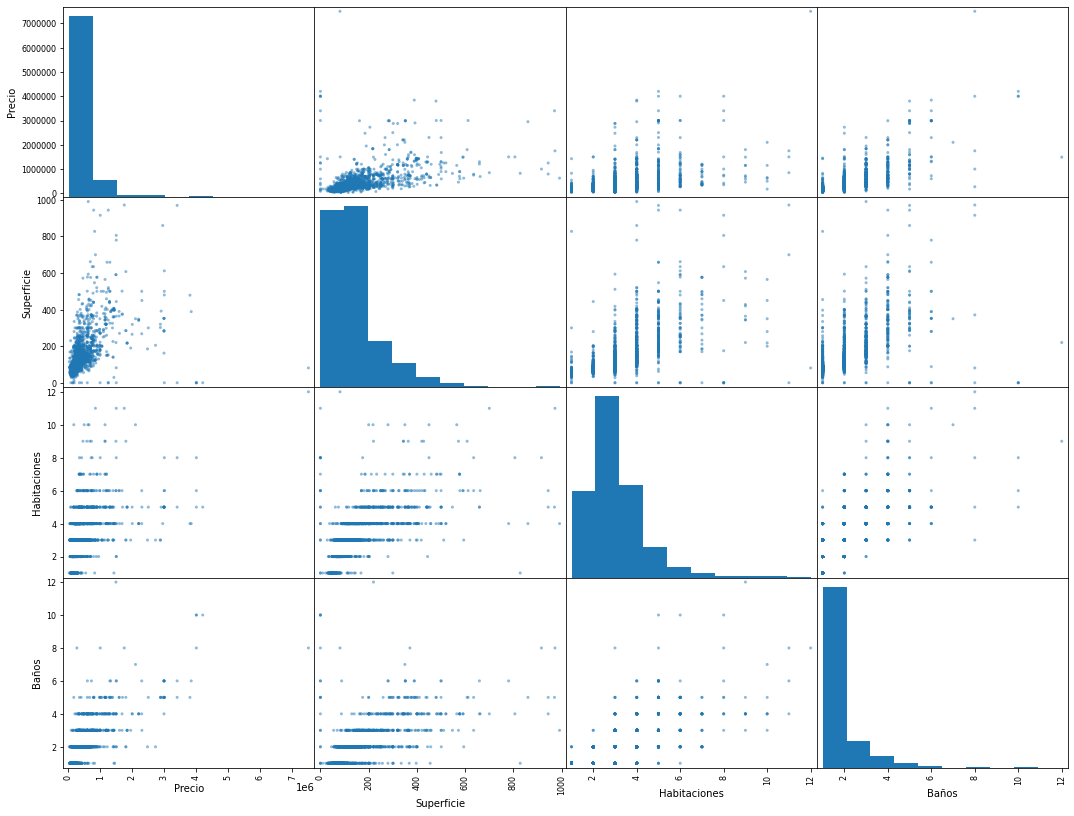

In [535]:
from pandas.plotting import scatter_matrix

attributes = ["Precio", "Superficie", "Habitaciones", "Baños"]
scatter_matrix(houses[attributes], figsize=(18,14))
plt.show()

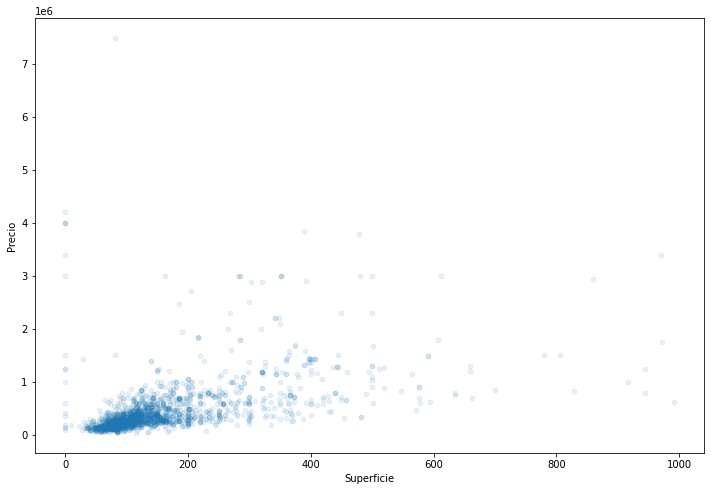

In [536]:
houses.plot(kind="scatter", x = "Superficie", y = "Precio", figsize = (12, 8), alpha = 0.1)
plt.show()

Para ver las relaciones entre atributos, podemos usar un mapa de calor.

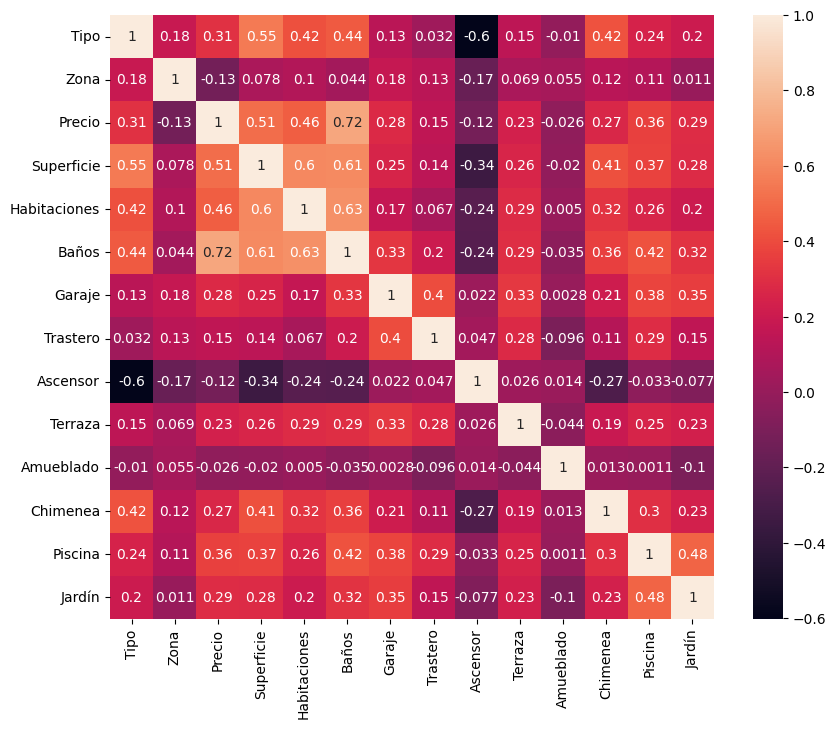

In [537]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(corr_matrix, annot=True, square=True, ax=ax)
plt.show()

De esta forma de escalera se ven más las correlaciones

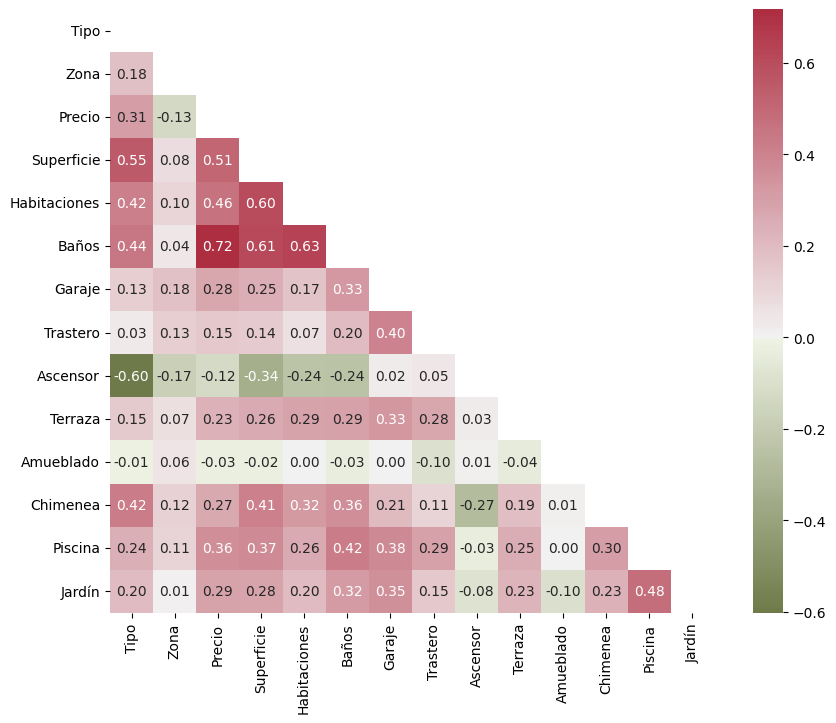

In [538]:
my_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
my_cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

sns.heatmap(corr_matrix, mask=my_mask, cmap=my_cmap, ax=ax, center=0, fmt='.2f', annot=True, square=True)
plt.show()

Con estas gráficas vemos que hay varias correlaciones. Entre ellas observamos que el `Tipo` está correlacionado con la `Superficie`, ya que esta varía según sea Piso o Chalet, por ejemplo. 

También vemos que los `Baños` están bastante correlacionados con el `Precio` o con las `Habitaciones`. 

### Separación de la matriz de características $X$ de los datos de salida $y$ (el target)

Como lo que queremos predecir es el `Precio` de las viviendas en Málaga, lo asignamos como dato de salida $y$ (target)

In [539]:
y = houses['Precio']
y

0        115000
1        295000
2        477000
3       1950000
4        126000
         ...   
2185     160000
2186     182000
2187     320000
2188     340000
2189     650000
Name: Precio, Length: 2094, dtype: int64

Contamos con todas las categorías para la matriz de características $X$. Exceptuamos el `Precio`, porque es el target.

In [540]:
X = houses.drop('Precio', axis=1)
X

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,0,69,2,1,0,0,0,0,1,0,0,0
1,0,1,70,2,1,0,1,1,0,0,0,0,0
2,1,2,170,6,2,0,1,0,1,0,0,0,0
3,2,1,190,3,3,1,1,1,1,0,0,0,0
4,3,3,90,3,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,72,2,1,0,0,1,0,1,0,0,0
2186,0,1,112,4,1,0,0,1,0,0,0,0,0
2187,3,6,160,4,2,1,1,0,1,1,1,1,0
2188,0,5,155,3,2,1,1,1,1,0,0,1,0


### Creación de los datos de prueba

Separamos el dataset en dos partes:

* Datos de entrenamiento (training set) - 80%
* Datos de prueba (testing set) - 20% (Si tenemos muchos datos el porcentaje es menor)

In [541]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [542]:
X_train

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
112,0,4,123,4,3,0,0,1,1,1,0,0,0
1320,0,2,350,4,3,0,0,0,1,0,0,0,0
1135,0,1,171,4,2,0,0,1,1,0,0,0,0
615,2,1,166,2,2,0,0,0,1,0,0,0,0
921,0,8,80,3,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,4,2,420,4,3,1,1,0,1,0,1,1,1
2187,3,6,160,4,2,1,1,0,1,1,1,1,0
1611,4,3,860,4,5,1,0,0,0,0,0,1,1
351,3,10,157,4,2,1,1,0,1,1,1,0,0


In [543]:
X_test

,Tipo,Zona,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
666,3,10,280,5,2,1,1,0,1,1,0,0,0
1760,4,2,322,5,5,1,0,0,1,0,1,1,0
814,0,4,95,2,1,0,0,1,0,0,0,0,0
1421,2,0,147,3,1,0,1,1,1,0,0,0,0
440,0,1,96,3,2,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,3,0,158,3,2,0,0,0,1,1,0,0,0
961,2,0,140,3,2,1,1,1,1,1,1,0,0
1956,4,2,326,6,5,1,1,0,0,0,0,1,1
1368,0,4,80,2,2,0,1,1,0,0,0,0,0


In [544]:
y_train

112      415000
1320     560000
1135     575000
615      495000
921      149000
         ...   
1744     720000
2187     320000
1611    2950000
351      275000
654      425000
Name: Precio, Length: 1884, dtype: int64

In [545]:
y_test

666      360000
1760    1150000
814      232000
1421     259000
440      350000
         ...   
439      270000
961      270000
1956    1300000
1368     273300
863      119900
Name: Precio, Length: 210, dtype: int64

## 6. Entrenamiento del modelo y comprobación del rendimiento

Para comprobar el rendimiento, usamos 11 algoritmos para tener varias opciones.


### LinearRegression

Primero probamos la regresión lineal.

In [546]:
from sklearn.linear_model import LinearRegression

houses_model = LinearRegression()

In [547]:
# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

LinearRegression()

In [548]:
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

In [549]:
print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    333632.02         26367.98
1150000.00   1400452.58        250452.58
232000.00    112106.17        119893.83
259000.00    239003.36         19996.64
350000.00    455503.41        105503.41
501000.00    431454.13         69545.87
4000000.00   2588577.45       1411422.55
233000.00     54108.18        178891.82
519000.00    498231.68         20768.32
340000.00    946567.86        606567.86
225000.00    429425.15        204425.15
397000.00    576039.10        179039.10
265000.00    212972.98         52027.02
630000.00    361852.08        268147.92
175000.00      6156.02        168843.98
66400.00     57077.98          9322.02
346000.00    365524.26         19524.26
210000.00    390338.84        180338.84
304000.00    182921.49        121078.51
146000.00    -46225.62        192225.62


In [550]:
from sklearn.metrics import mean_squared_error, r2_score

# Coeficientes
print("Coeficientes: \n", houses_model.coef_)

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Coeficientes: 
 [ -1087.82942748 -26251.65493073    529.30966235   -943.5350603
 266423.96145112  45266.3693088   -1146.8762145   35443.73129493
  -1367.46677452  13475.32584489 -10382.4067812   59103.11607327
  29273.3804839 ]
Error cuadrático medio:  302868.9787329546
Coeficiente de determinación:  0.6075611416090287


### DecisionTreeRegressor

Probamos con árboles de decisión.

In [551]:
from sklearn.tree import DecisionTreeRegressor

houses_model = DecisionTreeRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    690000.00        330000.00
1150000.00    790000.00        360000.00
232000.00    140000.00         92000.00
259000.00    199500.00         59500.00
350000.00    255000.00         95000.00
501000.00    567333.33         66333.33
4000000.00   4200000.00        200000.00
233000.00    186500.00         46500.00
519000.00    450000.00         69000.00
340000.00    340000.00             0.00
225000.00    279000.00         54000.00
397000.00    395000.00          2000.00
265000.00    600000.00        335000.00
630000.00    478000.00        152000.00
175000.00    175000.00             0.00
66400.00    144000.00         77600.00
346000.00    341500.00          4500.00
210000.00    371830.00        161830.00
304000.00    209595.00         94405.00
146000.00    139000.00          7000.00


In [552]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  229077.50773401986
Coeficiente de determinación:  0.7754943286123135


### RandomForestRegressor

Probamos con random forest.

In [553]:
from sklearn.ensemble import RandomForestRegressor

houses_model = RandomForestRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    462719.90        102719.90
1150000.00   1167940.00         17940.00
232000.00    189731.45         42268.55
259000.00    256169.45          2830.55
350000.00    317919.67         32080.33
501000.00    563262.86         62262.86
4000000.00   3546590.00        453410.00
233000.00    203922.00         29078.00
519000.00    494135.00         24865.00
340000.00    487790.00        147790.00
225000.00    371180.00        146180.00
397000.00    403063.33          6063.33
265000.00    438360.50        173360.50
630000.00    457929.80        172070.20
175000.00    175609.00           609.00
66400.00    126467.23         60067.23
346000.00    339254.00          6746.00
210000.00    541407.20        331407.20
304000.00    249385.84         54614.16
146000.00    120369.04         25630.96


In [554]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  207176.73129824348
Coeficiente de determinación:  0.8163696884881799


### GradientBoostingRegressor

Probamos con gradient boosting.

In [555]:
from sklearn.ensemble import GradientBoostingRegressor

houses_model = GradientBoostingRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    374796.38         14796.38
1150000.00   1580484.62        430484.62
232000.00    184982.70         47017.30
259000.00    273220.05         14220.05
350000.00    343535.05          6464.95
501000.00    458692.23         42307.77
4000000.00   4381729.83        381729.83
233000.00    199895.49         33104.51
519000.00    472407.32         46592.68
340000.00    564524.12        224524.12
225000.00    350103.99        125103.99
397000.00    503947.79        106947.79
265000.00    336920.54         71920.54
630000.00    441794.47        188205.53
175000.00    160391.52         14608.48
66400.00    152166.38         85766.38
346000.00    332362.70         13637.30
210000.00    512204.13        302204.13
304000.00    218283.44         85716.56
146000.00    127575.19         18424.81


In [556]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  213949.8682299439
Coeficiente de determinación:  0.8041667352589665


### ElasticNet

Probamos con elastic net.

In [557]:
from sklearn.linear_model import ElasticNet

houses_model = ElasticNet()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    462634.09        102634.09
1150000.00   1189316.46         39316.46
232000.00    154962.89         77037.11
259000.00    365604.55        106604.55
350000.00    422278.42         72278.42
501000.00    407044.52         93955.48
4000000.00   1720628.26       2279371.74
233000.00     75461.80        157538.20
519000.00    484854.56         34145.44
340000.00   1023818.58        683818.58
225000.00    387840.24        162840.24
397000.00    512166.12        115166.12
265000.00    302051.27         37051.27
630000.00    458059.16        171940.84
175000.00     76150.40         98849.60
66400.00    106434.68         40034.68
346000.00    361343.42         15343.42
210000.00    532213.86        322213.86
304000.00    218298.01         85701.99
146000.00     32609.45        113390.55


In [558]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  320474.49328988726
Coeficiente de determinación:  0.5606108216959396


### BayesianRidge

Probamos con bayesian ridge.

In [559]:
from sklearn.linear_model import BayesianRidge

houses_model = BayesianRidge()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    338136.77         21863.23
1150000.00   1394767.62        244767.62
232000.00    112506.82        119493.18
259000.00    243664.64         15335.36
350000.00    454473.54        104473.54
501000.00    431551.49         69448.51
4000000.00   2563982.12       1436017.88
233000.00     54402.19        178597.81
519000.00    497534.11         21465.89
340000.00    951458.66        611458.66
225000.00    427990.79        202990.79
397000.00    574269.40        177269.40
265000.00    216093.14         48906.86
630000.00    366527.53        263472.47
175000.00      7524.30        167475.70
66400.00     58530.22          7869.78
346000.00    366934.53         20934.53
210000.00    395161.08        185161.08
304000.00    183330.18        120669.82
146000.00    -43750.75        189750.75


In [560]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  302773.0153816353
Coeficiente de determinación:  0.6078097889415726


### CatBoostRegressor

Probamos con cat boost.

In [561]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [562]:
from catboost import CatBoostRegressor

houses_model = CatBoostRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Learning rate set to 0.045252
0:	learn: 460821.3132284	total: 1.86ms	remaining: 1.86s
1:	learn: 449769.6530686	total: 3.19ms	remaining: 1.59s
2:	learn: 440755.7702312	total: 4.74ms	remaining: 1.57s
3:	learn: 430493.1008732	total: 6.42ms	remaining: 1.6s
4:	learn: 420972.3560367	total: 7.8ms	remaining: 1.55s
5:	learn: 412007.5384525	total: 9.43ms	remaining: 1.56s
6:	learn: 403784.3531820	total: 10.7ms	remaining: 1.52s
7:	learn: 396864.8987943	total: 12.2ms	remaining: 1.51s
8:	learn: 389092.5941761	total: 13.5ms	remaining: 1.49s
9:	learn: 381427.3309185	total: 14.8ms	remaining: 1.47s
10:	learn: 374670.5360157	total: 16.2ms	remaining: 1.45s
11:	learn: 368675.6764406	total: 17.5ms	remaining: 1.44s
12:	learn: 363002.6245182	total: 18.8ms	remaining: 1.42s
13:	learn: 357096.2680273	total: 19.9ms	remaining: 1.4s
14:	learn: 351352.2479394	total: 21.2ms	remaining: 1.39s
15:	learn: 345973.0480037	total: 22.4ms	remaining: 1.38s
16:	learn: 341008.8393624	total: 23.6ms	remaining: 1.37s
17:	learn: 335

In [563]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  201095.72206525147
Coeficiente de determinación:  0.8269912448697468


### XGBRegressor

Probamos con XGB.

In [564]:
from xgboost.sklearn import XGBRegressor

houses_model = XGBRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    393891.69         33891.69
1150000.00   1218564.62         68564.62
232000.00    228470.22          3529.78
259000.00    165721.03         93278.97
350000.00    378534.94         28534.94
501000.00    544122.88         43122.88
4000000.00   3965337.75         34662.25
233000.00    266849.34         33849.34
519000.00    414469.22        104530.78
340000.00    369844.22         29844.22
225000.00    373846.25        148846.25
397000.00    401979.03          4979.03
265000.00    415863.81        150863.81
630000.00    469477.88        160522.12
175000.00    172999.59          2000.41
66400.00    120248.54         53848.54
346000.00    331666.25         14333.75
210000.00    402450.84        192450.84
304000.00    276874.94         27125.06
146000.00    108543.35         37456.65


In [565]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  193721.12023314566
Coeficiente de determinación:  0.8394477630189758


### LGBMRegressor

Probamos con LGBM.

In [566]:
from lightgbm import LGBMRegressor

houses_model = LGBMRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    504227.36        144227.36
1150000.00   1483169.15        333169.15
232000.00    240347.44          8347.44
259000.00    257718.51          1281.49
350000.00    355160.09          5160.09
501000.00    590221.15         89221.15
4000000.00   3642646.12        357353.88
233000.00    220266.10         12733.90
519000.00    414732.18        104267.82
340000.00    210287.10        129712.90
225000.00    351363.66        126363.66
397000.00    405680.86          8680.86
265000.00    365695.34        100695.34
630000.00    422309.98        207690.02
175000.00    168759.17          6240.83
66400.00    121801.21         55401.21
346000.00    340008.65          5991.35
210000.00    480344.06        270344.06
304000.00    264487.90         39512.10
146000.00    114391.36         31608.64


In [567]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  219194.78104714258
Coeficiente de determinación:  0.7944474653054074


### Lasso

Probamos con Lasso.

In [568]:
from sklearn.linear_model import Lasso

houses_model = Lasso(alpha=1.0)

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    333634.37         26365.63
1150000.00   1400459.74        250459.74
232000.00    112104.10        119895.90
259000.00    239014.16         19985.84
350000.00    455506.55        105506.55
501000.00    431458.92         69541.08
4000000.00   2588571.17       1411428.83
233000.00     54102.09        178897.91
519000.00    498224.22         20775.78
340000.00    946590.90        606590.90
225000.00    429422.71        204422.71
397000.00    576030.27        179030.27
265000.00    212970.95         52029.05
630000.00    361871.37        268128.63
175000.00      6154.85        168845.15
66400.00     57080.43          9319.57
346000.00    365533.40         19533.40
210000.00    390350.68        180350.68
304000.00    182919.61        121080.39
146000.00    -46222.30        192222.30


In [569]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  302868.8117262453
Coeficiente de determinación:  0.6075615744028036


### Ridge



Probamos con Ridge.

In [570]:
from sklearn.linear_model import Ridge

houses_model = Ridge(alpha=1.0)

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
360000.00    333916.52         26083.48
1150000.00   1400101.34        250101.34
232000.00    112130.04        119869.96
259000.00    239301.01         19698.99
350000.00    455438.41        105438.41
501000.00    431463.42         69536.58
4000000.00   2587030.46       1412969.54
233000.00     54127.13        178872.87
519000.00    498185.65         20814.35
340000.00    946895.16        606895.16
225000.00    429333.30        204333.30
397000.00    575925.03        178925.03
265000.00    213171.59         51828.41
630000.00    362161.70        267838.30
175000.00      6240.96        168759.04
66400.00     57171.16          9228.84
346000.00    365618.98         19618.98
210000.00    390644.19        180644.19
304000.00    182946.51        121053.49
146000.00    -46067.93        192067.93


In [571]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  302861.3112028248
Coeficiente de determinación:  0.6075810115785087


## 7. Aplicación de Procesamiento de Lenguaje Natural

# 8. Enlace a la aplicación web 

In [572]:
#import joblib
#joblib.dump(houses_model, "houses_model.pkl")

# 9. Conclusiones